In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [49]:
df = pd.read_csv('tumor_data_univariate.csv')

In [50]:
df

,Tumor_Size,Malignant
0,1.935247,0
1,4.758500,1
2,3.686770,1
3,3.033427,0
4,0.864491,0
...,...,...
395,4.660711,1
396,4.306222,1
397,2.202071,0
398,3.779268,1


In [51]:
df['Malignant'].value_counts()

Malignant
0    257
1    143
Name: count, dtype: int64

<Axes: xlabel='Tumor_Size', ylabel='Count'>

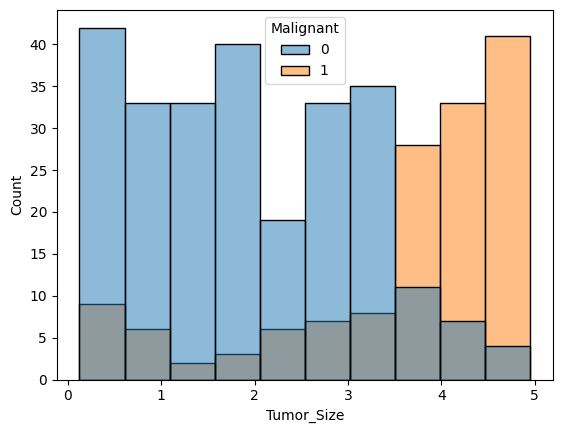

In [52]:
sns.histplot(data=df, x='Tumor_Size', hue='Malignant', kde=False)

In [53]:
X = df['Tumor_Size']
y = df['Malignant']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

In [54]:
model = LogisticRegression()
model.fit(pd.DataFrame(X_train), pd.DataFrame(y_train))

c:\Users\Home\Desktop\excalibur-camp\Excalibur_AI_Camp\venv\lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [55]:
y_pred = model.predict_proba(pd.DataFrame(X_test))[:, 1]
y_pred

array([0.068161  , 0.8003742 , 0.84708746, 0.38101542, 0.39738657,
       0.14298678, 0.10545739, 0.67590428, 0.58150517, 0.72974799,
       0.59620251, 0.50848541, 0.0468705 , 0.03023829, 0.05519542,
       0.03524877, 0.58810605, 0.75783235, 0.32336481, 0.71372423,
       0.0434512 , 0.07647645, 0.2257205 , 0.72110694, 0.19128006,
       0.77121142, 0.49491784, 0.10353507, 0.06127905, 0.81533573,
       0.83374409, 0.49450292, 0.87413087, 0.08149936, 0.4181038 ,
       0.71393863, 0.71890078, 0.07261248, 0.10034228, 0.10757441,
       0.58113288, 0.82687254, 0.67626882, 0.69275502, 0.15691722,
       0.48879598, 0.03858288, 0.05339348, 0.13077358, 0.09495297,
       0.14347783, 0.60479518, 0.29015343, 0.67743908, 0.04280405,
       0.25323257, 0.18555049, 0.33482777, 0.4595096 , 0.06281631,
       0.09563435, 0.05729227, 0.39151627, 0.17799715, 0.49904495,
       0.07162857, 0.52959883, 0.17882246, 0.16424765, 0.72697413,
       0.38165389, 0.85648578, 0.06650131, 0.53483261, 0.65095

In [56]:
tumor_size_range = np.linspace(0, 5, 200)

In [57]:
tumor_size_range

array([0.        , 0.02512563, 0.05025126, 0.07537688, 0.10050251,
       0.12562814, 0.15075377, 0.1758794 , 0.20100503, 0.22613065,
       0.25125628, 0.27638191, 0.30150754, 0.32663317, 0.35175879,
       0.37688442, 0.40201005, 0.42713568, 0.45226131, 0.47738693,
       0.50251256, 0.52763819, 0.55276382, 0.57788945, 0.60301508,
       0.6281407 , 0.65326633, 0.67839196, 0.70351759, 0.72864322,
       0.75376884, 0.77889447, 0.8040201 , 0.82914573, 0.85427136,
       0.87939698, 0.90452261, 0.92964824, 0.95477387, 0.9798995 ,
       1.00502513, 1.03015075, 1.05527638, 1.08040201, 1.10552764,
       1.13065327, 1.15577889, 1.18090452, 1.20603015, 1.23115578,
       1.25628141, 1.28140704, 1.30653266, 1.33165829, 1.35678392,
       1.38190955, 1.40703518, 1.4321608 , 1.45728643, 1.48241206,
       1.50753769, 1.53266332, 1.55778894, 1.58291457, 1.6080402 ,
       1.63316583, 1.65829146, 1.68341709, 1.70854271, 1.73366834,
       1.75879397, 1.7839196 , 1.80904523, 1.83417085, 1.85929

In [58]:
predicted_probabilities = model.predict_proba(pd.DataFrame(tumor_size_range))[:, 1]

c:\Users\Home\Desktop\excalibur-camp\Excalibur_AI_Camp\venv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


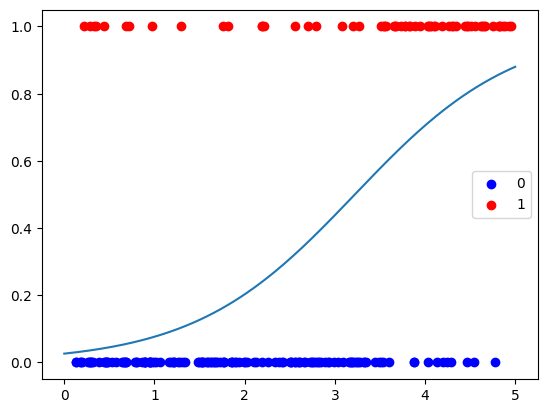

In [59]:
plt.plot(tumor_size_range, predicted_probabilities)
plt.scatter(X_test[y_test == 0], y_test[y_test == 0], color='blue', label='0', marker='o')
plt.scatter(X_test[y_test == 1], y_test[y_test == 1], color='red', label='1', marker='o')
plt.legend()
plt.show()

In [60]:
thresholds = np.linspace(0, 1, 20)

scores = []
for t in thresholds:
    score = accuracy_score(pd.DataFrame(y_test), y_pred >= t)
    scores.append(score)

Text(0, 0.5, 'accuracy')

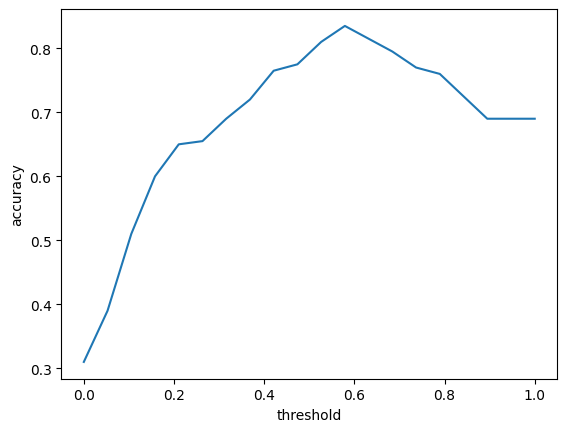

In [69]:
plt.plot(thresholds, scores)
plt.xlabel('threshold')
plt.ylabel('accuracy')

In [70]:
actual_pos = (y_test == 1)
actual_neg = (y_test == 0)

pred_pos = (y_pred >= 0.5)
pred_neg = (y_pred < 0.5)

tp = (actual_pos & pred_pos).sum()
tn = (actual_neg & pred_neg).sum()
fp = (actual_neg & pred_pos).sum()
fn = (actual_pos & pred_neg).sum()

In [72]:
print(tp)
print(tn)
print(fp)
print(fn)

43
117
21
19


In [73]:
recall = tp / (tp + fn)
precision = tp / (tp + fp)

In [74]:
print(recall)
print(precision)

0.6935483870967742
0.671875


In [78]:
def f1_score_custom(recall, precision):
    return 2*precision*recall / (precision + recall)

In [79]:
f1_score_custom(recall, precision)

np.float64(0.6825396825396826)

In [81]:
from sklearn.metrics import recall_score, precision_score

In [84]:
thresholds = np.linspace(0, 1, 20)

scores = []
for t in thresholds:
    recall = recall_score(y_test, y_pred >= t)
    precision = precision_score(y_test, y_pred >= t)
    scores.append((t, recall, precision))

scores_df = pd.DataFrame(scores, columns=['t', 'recall', 'precision'])
scores_df

c:\Users\Home\Desktop\excalibur-camp\Excalibur_AI_Camp\venv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Home\Desktop\excalibur-camp\Excalibur_AI_Camp\venv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Home\Desktop\excalibur-camp\Excalibur_AI_Camp\venv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f

,t,recall,precision
0,0.000000,1.000000,0.310000
1,0.052632,0.919355,0.327586
2,0.105263,0.854839,0.373239
3,0.157895,0.854839,0.427419
4,0.210526,0.822581,0.463636
5,0.263158,0.774194,0.466019
6,0.315789,0.774194,0.500000
7,0.368421,0.741935,0.534884
8,0.421053,0.725806,0.600000
9,0.473684,0.709677,0.619718


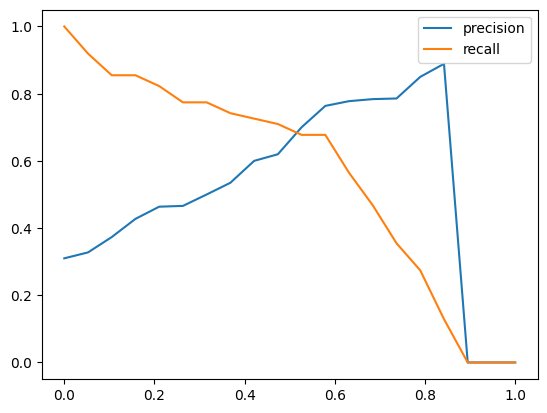

In [88]:
plt.plot(scores_df.t, scores_df.precision, label='precision')
plt.plot(scores_df.t, scores_df.recall, label='recall')
plt.legend()
plt.show()

In [92]:
confusion_matrix = np.array([
    [tp, fn],
    [fp, tn]
])
confusion_matrix

array([[ 43,  19],
       [ 21, 117]])

In [93]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, (y_pred >= 0.5))

array([[117,  21],
       [ 19,  43]])

In [94]:
confusion_matrix = np.array([
    [tn, fp],
    [fn, tp]
])
confusion_matrix

array([[117,  21],
       [ 19,  43]])

In [96]:
tpr = tp / (tp + fn)
fpr = fp / (fp + tn)

print(tpr)
print(fpr)

0.6935483870967742
0.15217391304347827


In [100]:
thresholds = np.linspace(0, 1, 20)

scores = []
for t in thresholds:
    pred_pos = (y_pred >= t)
    pred_neg = (y_pred < t)
    
    tp = (actual_pos & pred_pos).sum()
    tn = (actual_neg & pred_neg).sum()
    fp = (actual_neg & pred_pos).sum()
    fn = (actual_pos & pred_neg).sum()

    scores.append((t, tp, tn, fp, fn))

scores_df = pd.DataFrame(scores, columns=['t', 'tp', 'tn', 'fp', 'fn'])
scores_df['tpr'] = scores_df['tp'] / (scores_df['tp'] + scores_df['fn'])
scores_df['fpr'] = scores_df['fp'] / (scores_df['fp'] + scores_df['tn'])

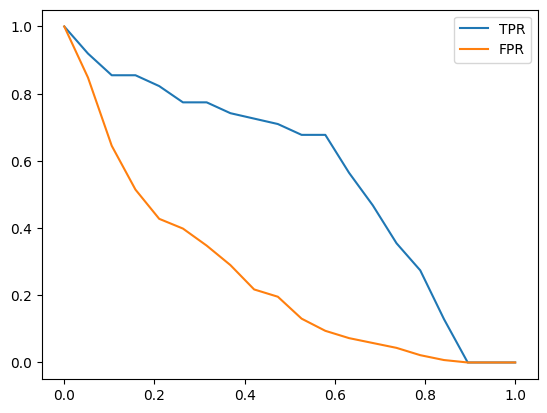

In [103]:
plt.plot(scores_df.t, scores_df.tpr, label='TPR')
plt.plot(scores_df.t, scores_df.fpr, label='FPR')
plt.legend()
plt.show()

Text(0, 0.5, 'True Positive Rate')

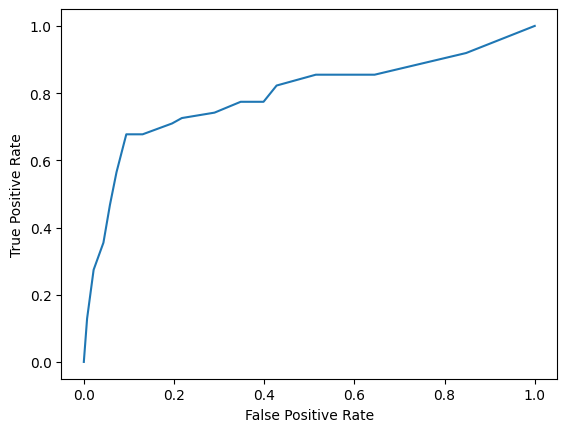

In [104]:
plt.plot(scores_df['fpr'], scores_df['tpr'])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [107]:
y_rand = np.random.uniform(0, 1, size=len(y_test))

In [129]:
False in (df == df.copy()).value_counts().index

False